**Actividad 5:** Uso de software para búsqueda. **Alumna:** María Fernanda Ramos Campos **Matrícula:** 2109376 **Hora clase:** N4

**Descripción de la actividad:** Entrenamiento de un modelo de Red Neuronal Prealimentada (tipo feedforward). Utilizando el conjunto de datos MNIST, la red neuronal identificará imágenes de baja resolución de dígitos del 0 al 9.



In [156]:
# 1. Importamos las librerías a utilizar.
import tensorflow as tf
import numpy as np #para la generación de arreglos y números aleatorios.
import matplotlib.pyplot as plt #para graficar.

In [157]:
# 2. Importamos funciones a trabajar.
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [158]:
# 3. Importamos el conjunto de datos MNIST.
mnist = keras.datasets.mnist

     #Separamos en conjunto de entrenamiento y de prueba.
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


In [159]:
# 4. Incluimos y almacenamos los Class Names.
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [160]:
# 5. Revisamos y nos aseguramos de la estructura del set de datos.
print(train_images.shape)
len(train_labels)

(60000, 28, 28)


60000

In [161]:
print(train_labels)

[5 0 4 ... 5 6 8]


In [162]:
print(test_images.shape)
len(test_labels)

(10000, 28, 28)


10000

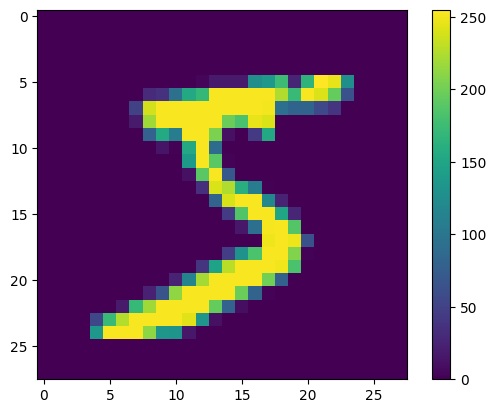

In [163]:
# 6. Iniciamos el pre-procesamiento de datos.

  # Nos aseguramos de que el rango de los valores de los pixeles sea correcto (0-255).

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


In [164]:
  # Escalamos los valores de pixeles para que se ajuste la escala de 0 a 1.
train_images = train_images / 255.0
test_images = test_images / 255.0

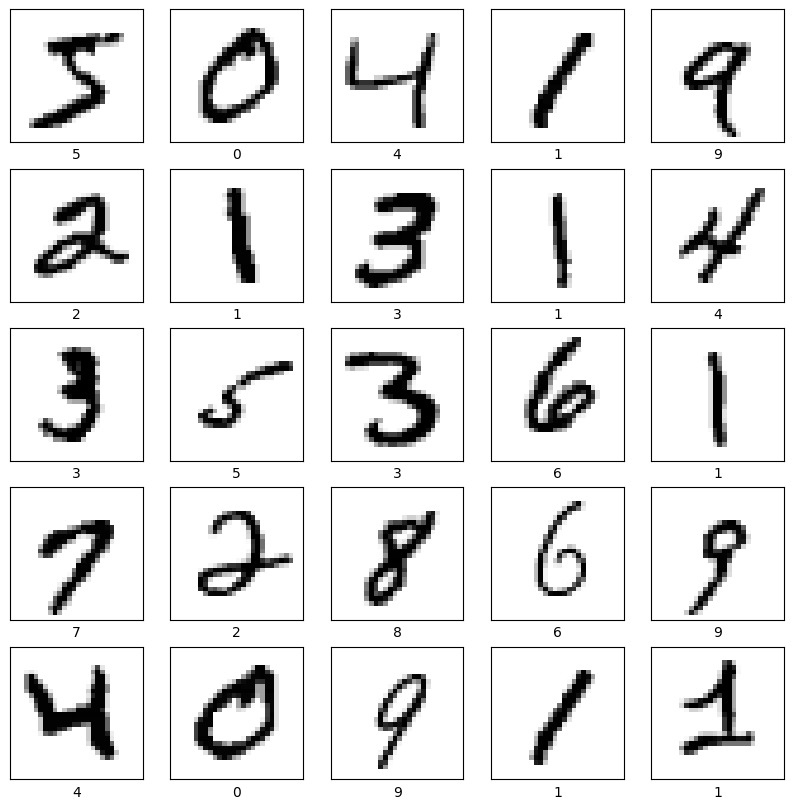

In [165]:
  # Mostramos las primeras 25 imágenes del Training Setg para verificar el formato del set de datos.
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [166]:
# 7. Comenzamos con la configuración de capas del modelo.
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), #Cambiamos el arreglo a unidimensional.
    keras.layers.Dense(128, activation='relu'), #Capa conteniendo 128 neuronas.
    keras.layers.Dense(10, activation='softmax') #Capa softmax (función de activación de capa de salida) de 10 neuronas (al ser diez clases)
])


In [167]:
# 8. Ya teniendo sus capas, compilamos el modelo, agregando configuraciones necesarias.

    # Separamos para tener datos de validación.
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])  #Métrica a utilizar (exactitud) para evaluar el proceso de entrenamiento.

In [168]:
# Comenzamos el entrenamiento con el método fit, que ajusta al set de datos de training.
history = model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2850 - accuracy: 0.9196 - val_loss: 0.1594 - val_accuracy: 0.9533
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1302 - accuracy: 0.9622 - val_loss: 0.1125 - val_accuracy: 0.9662
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0896 - accuracy: 0.9735 - val_loss: 0.1018 - val_accuracy: 0.9682
Epoch 4/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0680 - accuracy: 0.9791 - val_loss: 0.0935 - val_accuracy: 0.9727
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0514 - accuracy: 0.9842 - val_loss: 0.0883 - val_accuracy: 0.9753
Epoch 6/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0401 - accuracy: 0.9884 - val_loss: 0.0857 - val_accuracy: 0.9749
Epoch 7/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0313 - accuracy: 0.9908 - val_loss: 0.0875 - val_accuracy:

In [169]:
  # Obtuvimos exactitud del 99.49%, luego de diez épocas de ajuste.

# 11. Procedemos a evaluar la exactitud del modelo, comparando rendimiento con el set de datos.

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0863 - accuracy: 0.9767 - 922ms/epoch - 3ms/step

Test accuracy: 0.9767000079154968


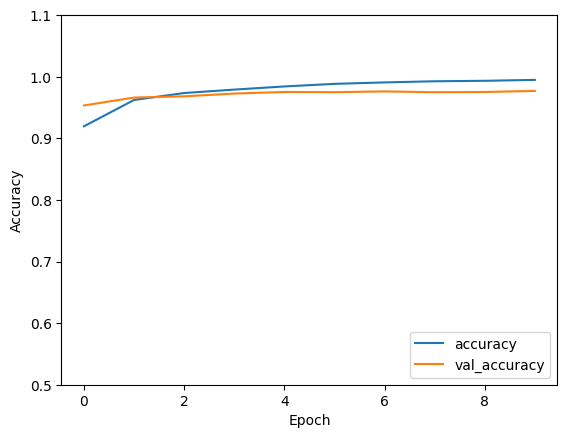

In [171]:
  # Comprobamos que la exactitud del set de datos (97.67%) es ligeramente menor que la del set de entrenamiento.

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.1])
plt.legend(loc='lower right')

plt.show()
  # Tal información nos indica que hay un ligero sobreajuste/ overfitting.


In [172]:
# 12. Continuamos con establecer el uso del modelo para predecir imágenes.
predictions = model.predict(test_images)
predictions[0] #Solicitamos la primera predicción.

313/313 [==============================] - 1s 2ms/step


array([9.2650269e-11, 4.0387507e-12, 1.5662696e-08, 1.2476183e-05,
       4.3371787e-13, 3.2658337e-10, 9.3301877e-17, 9.9998742e-01,
       8.9543212e-10, 4.1232742e-08], dtype=float32)

In [173]:
  #Obtenemos el valor máximo de confianza de la predicción.
np.argmax(predictions[0])

7

In [174]:
   # Esta predicción nos indica que el modelo detecta mayor probabilidad de que sea la clase 7 = número 7.
   # Comprobamos que la predicción es correcta.
test_labels[0]

7

In [175]:
# 13. Procedemos a graficar para ver el set de predicción.

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green' # El color de la predicción es verde si es correcta.
  else:
    color = 'red' # Color rojo si es lo contrario.

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)



In [176]:
  # Definimos a la función que nos va a graficar la confianza que se tiene en el porcentaje de predicción.
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red') # El color de la predicción será azul.
    thisplot[true_label].set_color('green') # El color de la verdadera etiqueta será verde.

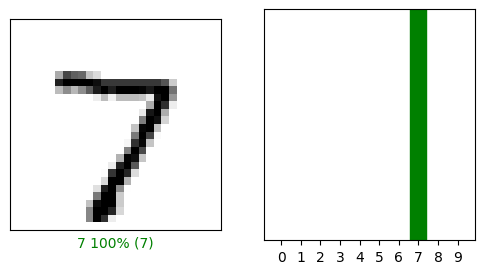

In [177]:
  # Solicitamos al set de predicción la información de la primera imagen.
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


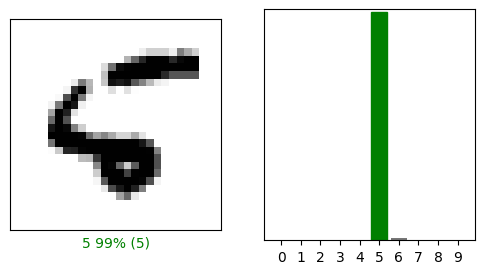

In [178]:
  # Obtenemos una seguridad del 99%, misma que se observa graficada con una barra verde.
  # Vemos que, efectivamente, se trata del número 7. Hacemos la misma prueba con otra predicción.
i = 8
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


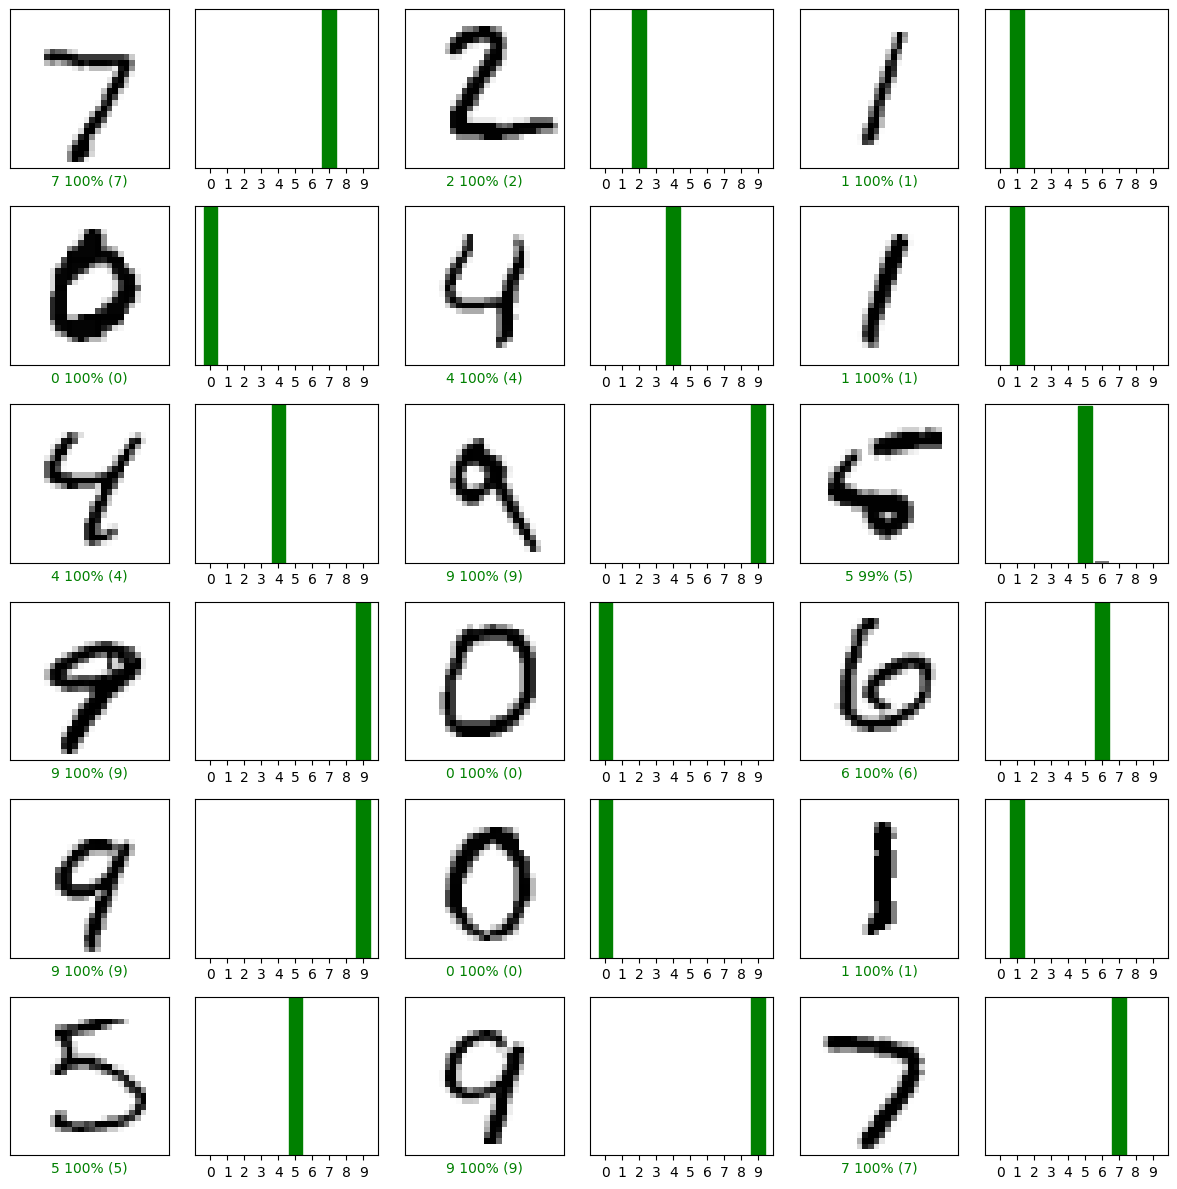

In [179]:
  # Con esto, podemos apreciar que está un 97% seguro de que se trata de un 5, y en realidad la imagen sí muestra un 5.

  # Graficamos distintas imágenes con sus predicciones, para motivos de comprobación.
num_rows = 6
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
 plt.subplot(num_rows, 2*num_cols, 2*i+1)
 plot_image(i, predictions[i], test_labels, test_images)
 plt.subplot(num_rows, 2*num_cols, 2*i+2)
 plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


In [180]:
  # Para más motivos de comprobación, nuevamente solicitamos una predicción para una imagen específica.
  img = test_images[2]
  print(img.shape)

  img = (np.expand_dims(img,0)) #La agregamos a un batch.
  print(img.shape)


(28, 28)
(1, 28, 28)


1/1 [==============================] - 0s 22ms/step
[[1.6255913e-07 9.9975497e-01 2.2654323e-05 2.0003517e-06 1.9754758e-07
  3.5606075e-07 8.8013581e-07 4.2170061e-05 1.7635761e-04 2.5315225e-07]]


1

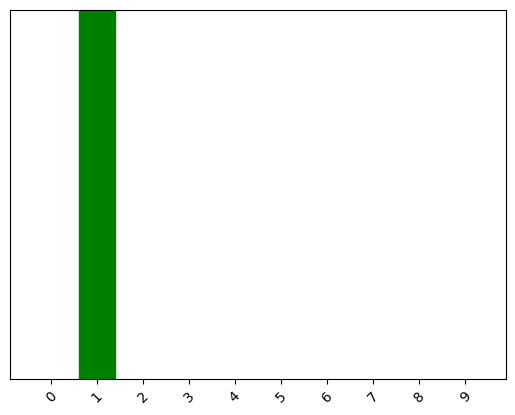

In [181]:
    # Predecimos la etiqueta correcta de la imagen
predictions_single = model.predict(img)
print(predictions_single)

    # Graficamos.
plot_value_array(2, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

    # Solicitamos predicción
np.argmax(predictions_single[0])



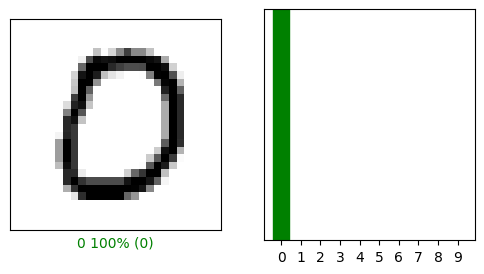

In [187]:
# Hacemos otras 5 predicciones, para verificar el comportamiento y comparar contra los datos reales.

        #  1
i = 10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

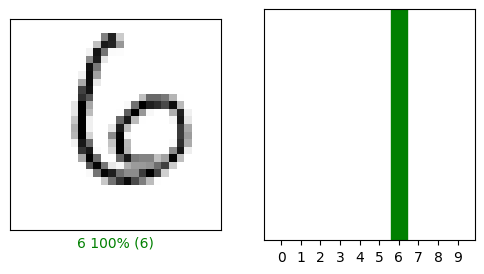

In [188]:
        #  2

i = 100
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

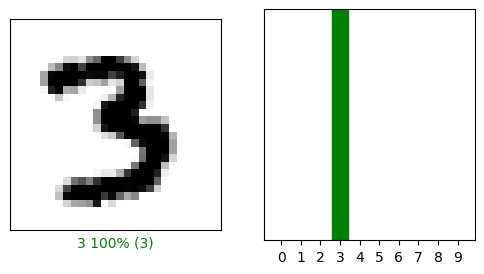

In [191]:
        #  3

i = 500
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

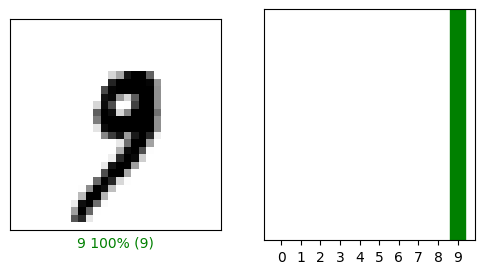

In [192]:
        #  4

i = 1000
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()